In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
classification_res = pd.read_csv('results.csv', index_col = 0)
classification_res

,E116,E122,E123
GCN,0.912025,0.906868,0.926330
MLP,0.908909,0.896096,0.918319
Weighted_Agg_GCN,0.911979,0.907122,0.926355
GAT,0.883976,0.885955,0.879030


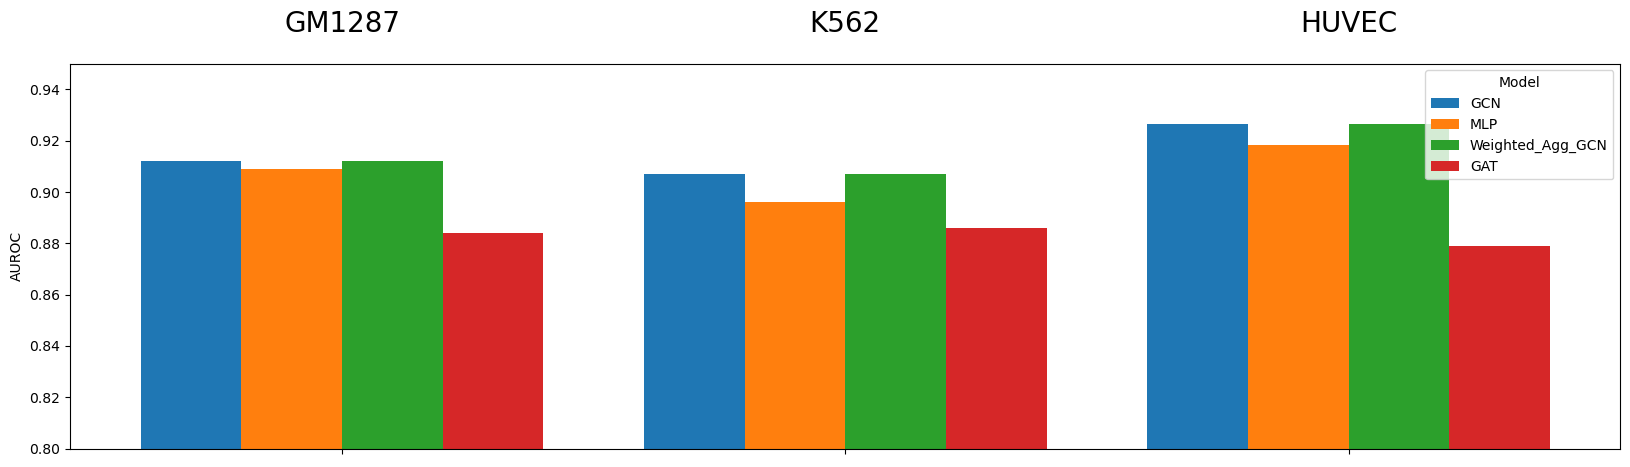

<Figure size 640x480 with 0 Axes>

In [12]:
cell_line_alias = {'E116': 'GM1287', 'E123': 'K562', 'E122': 'HUVEC'}

fig, ax = plt.subplots(figsize=(20, 5))
bar_width = 0.2
index = np.arange(len(classification_res.columns))

for i, model in enumerate(classification_res.index):
    ax.bar(index + i * bar_width, classification_res.loc[model], bar_width, label=model)

ax.set_ylabel('AUROC')
ax.set_ylim(0.8, 0.95)
ax.set_xticks(index + bar_width * (len(classification_res.index) - 1) / 2)
ax.set_xticklabels([])  # Remove the default x-tick labels

for i in range(len(cell_line_alias)):
    ax.text(index[i] + bar_width * (len(classification_res.index) - 1) / 2, 
            0.96,
            cell_line_alias[list(cell_line_alias.keys())[i]],
            ha='center', va='bottom', fontsize=20)

ax.legend(title='Model')
plt.show()
plt.savefig('barchart.png')

## Didn't add GAT with Neighbors yet